### Spectral Partitioning/Clustering

Spectral Partitioning is an unsupervised learning technique that uses eigen-decomposition to seperate clusters within a network.
> The process is three simple steps
1. Calculate Eigenvalues and Eigenvectors
2. Using the Eigenvectors(mostly the first) with the smallest non-zero eigenvalues
3. Use K-means clustering on the Selected Eigenvectors to label the nodes

In [1]:
#Making a well Clustered Network
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G=nx.Graph()
A=nx.complete_graph(10)
B=nx.complete_graph(20)
C=nx.complete_graph(25)
G=nx.disjoint_union_all([A,B,C])
G.add_edges_from([(0,15),(3,24),(4,24),(35,2),(50,36),(50,37)])
G.pos=nx.spring_layout(G)
nx.draw_networkx(G,pos=G.pos, ax=plt.axes(), with_labels=False)

In [2]:
L=nx.linalg.laplacian_matrix(G).todense()
val,vec = np.linalg.eig(L)

In [3]:
val

array([ 4.65170933e-01+0.0000000e+00j, -1.07314589e-15+0.0000000e+00j,
        5.46524081e-02+0.0000000e+00j,  2.60229902e+01+0.0000000e+00j,
        2.10362437e+01+0.0000000e+00j,  2.20713865e+01+0.0000000e+00j,
        1.05493845e+01+0.0000000e+00j,  1.08709049e+01+0.0000000e+00j,
        1.09292669e+01+0.0000000e+00j,  1.10000000e+01+0.0000000e+00j,
        1.00000000e+01+0.0000000e+00j,  1.00000000e+01+0.0000000e+00j,
        2.50000000e+01+0.0000000e+00j,  2.50000000e+01+0.0000000e+00j,
        2.50000000e+01+0.0000000e+00j,  1.00000000e+01+0.0000000e+00j,
        1.00000000e+01+0.0000000e+00j,  1.00000000e+01+0.0000000e+00j,
        2.50000000e+01+0.0000000e+00j,  2.50000000e+01+0.0000000e+00j,
        2.00000000e+01+0.0000000e+00j,  2.00000000e+01+0.0000000e+00j,
        2.00000000e+01+0.0000000e+00j,  2.00000000e+01+0.0000000e+00j,
        2.00000000e+01+0.0000000e+00j,  2.00000000e+01+0.0000000e+00j,
        2.00000000e+01+0.0000000e+00j,  2.50000000e+01+0.0000000e+00j,
      

In [4]:
vec

matrix([[ 2.51160796e-01+0.j, -1.34839972e-01+0.j, -8.64571925e-02+0.j,
         ..., -4.92650036e-18+0.j, -3.97065647e-18+0.j,
          7.70917142e-18+0.j],
        [ 2.87226021e-01+0.j, -1.34839972e-01+0.j, -8.11088181e-02+0.j,
         ..., -1.40369080e-17+0.j, -4.44942986e-17+0.j,
          1.48129140e-17+0.j],
        [ 2.58753999e-01+0.j, -1.34839972e-01+0.j, -6.10775152e-02+0.j,
         ...,  2.83917459e-17+0.j, -2.55603655e-18+0.j,
         -1.29383624e-17+0.j],
        ...,
        [-2.37867775e-02+0.j, -1.34839972e-01+0.j,  1.46126943e-01+0.j,
         ..., -4.09697985e-01+0.j, -2.95300348e-01+0.j,
         -4.74310938e-01+0.j],
        [-2.37867775e-02+0.j, -1.34839972e-01+0.j,  1.46126943e-01+0.j,
         ..., -5.80770087e-02+0.j,  1.04491873e-01+0.j,
         -1.17141571e-01+0.j],
        [-2.37867775e-02+0.j, -1.34839972e-01+0.j,  1.46126943e-01+0.j,
         ..., -2.49119418e-01+0.j, -3.38488950e-01+0.j,
          4.32896417e-01+0.j]])

In [5]:
i=np.where(val<0.5)[0]

C:\Users\REKan\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


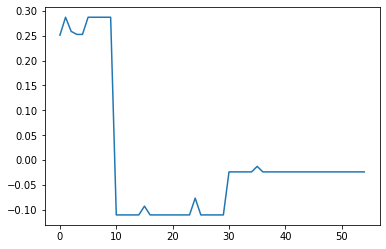

In [6]:
#Notice the well seperated groups of nodes
#This would be easy to apply K-Means to define the clusters
plt.plot(vec[:,i[0]])